### Time Series – Part2c – Smoothing (6d), Stationarity & Differencing
1.	Import libraries & set directory paths
2.	Import dataset and check dimensions and columns.
    -	Import: time_series_requests_per_day_from_Jun2020.csv
3.	Convert date column from string to date & check min and max dates.
4.	Convert dataframe to time series
5.	Time series decomposition
6.	Test for Stationarity
    -	Dickey-Fuller Test
    -	Autocorrelation
7.	Smoothing time series with 6 Day Moving Average
    -	Save MA to its own time series
8.	Revisit Dickey-Fuller and Autocorrelation.
9.	Convert Non-stationary data to Stationary using Differencing.
    -	Two rounds of differencing did not expunge the autocorrelation.

### import libraries

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# The use of .api also import the public access versin of statsmodels
# statsmodels handles statistical models
import statsmodels.api as sm

# Import warnings & disable deprecation warnings that could indicate, for instance, a suspended library or feature. 
    # These are more relevant to developers and very seldom to analysts.
import warnings
warnings.filterwarnings("ignore")

import quandl

# 'fivethirtyeight' is a styling option for how your plots will appear.
    # More examples:
    # https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
    # https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html
plt.style.use('fivethirtyeight')

### set directory paths

In [2]:
dataset = r'D:\My Documents\! Omnicompetent Ltd\Career Foundry - Data Analytics\Data Analytics Course\60 Advanced Analytics and Dashboard Design\Stone Signs Portal Analysis\02 Data'
dataset

'D:\\My Documents\\! Omnicompetent Ltd\\Career Foundry - Data Analytics\\Data Analytics Course\\60 Advanced Analytics and Dashboard Design\\Stone Signs Portal Analysis\\02 Data'

In [3]:
vizpath = r'D:\My Documents\! Omnicompetent Ltd\Career Foundry - Data Analytics\Data Analytics Course\60 Advanced Analytics and Dashboard Design\Stone Signs Portal Analysis\04 Analysis'
vizpath

'D:\\My Documents\\! Omnicompetent Ltd\\Career Foundry - Data Analytics\\Data Analytics Course\\60 Advanced Analytics and Dashboard Design\\Stone Signs Portal Analysis\\04 Analysis'

## Import Time Series data
    Daily sign requests made between 1st June 2020 and 31st August 2021

In [4]:
df_request_day = pd.read_csv(os.path.join(dataset,'time_series_requests_per_day_from_Jun2020.csv'))
df_request_day.head()

,date,requests_per_day
0,2020-06-01,55
1,2020-06-02,73
2,2020-06-03,56
3,2020-06-04,53
4,2020-06-05,57


### check dimensions & data types

In [5]:
df_request_day.shape

(457, 2)

In [6]:
df_request_day.dtypes

date                object
requests_per_day     int64
dtype: object

### convert date column from string to date format

In [7]:
df_request_day['date'] = pd.to_datetime(df_request_day['date'], format='%Y-%m-%d')

In [8]:
df_request_day.dtypes

date                datetime64[ns]
requests_per_day             int64
dtype: object

### check min and max values for request_date
    to ensure conversion carried out correctly

In [9]:
df_request_day['date'].min()

Timestamp('2020-06-01 00:00:00')

In [10]:
df_request_day['date'].max()

Timestamp('2021-08-31 00:00:00')

### convert to time series by setting the 'date' as the index

In [11]:
df_request_day = df_request_day.set_index(['date'])
df_request_day.head()

,requests_per_day
date,
2020-06-01,55
2020-06-02,73
2020-06-03,56
2020-06-04,53
2020-06-05,57


In [12]:
df_request_day.tail()

,requests_per_day
date,
2021-08-27,33
2021-08-28,9
2021-08-29,0
2021-08-30,0
2021-08-31,38


### check for nulls

In [15]:
df_request_day.isnull().sum()

requests_per_day    0
dtype: int64

## Display as time series plot

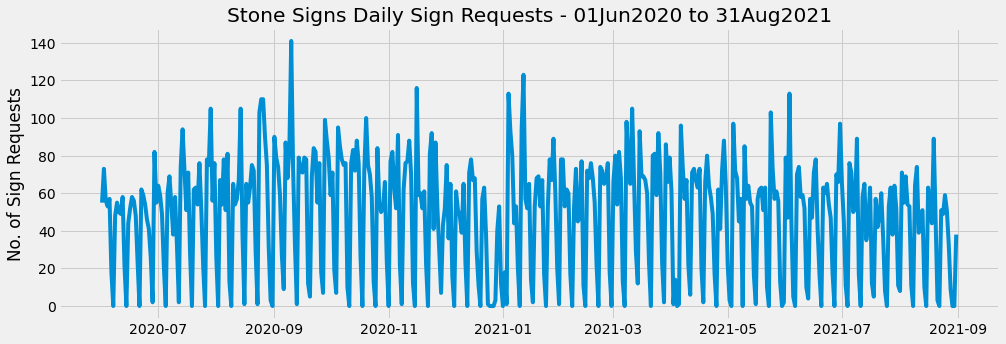

In [13]:
plt.figure(figsize=(15,5))
plt.title('Stone Signs Daily Sign Requests - 01Jun2020 to 31Aug2021')
plt.ylabel('No. of Sign Requests')
plt.plot(df_request_day)

plt.savefig(os.path.join(vizpath,'00 Time Series - Daily Sign Requests - Original - 01Jun2020 to 31Aug2021.png'))

## Time Series Decompostion
    1) Define a fixed size for all special charts using rcParams.
    2) Carry out the decomposition.
    3) Display as plot.

In [14]:
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

In [15]:
decomposition = sm.tsa.seasonal_decompose(df_request_day, model='additive') 

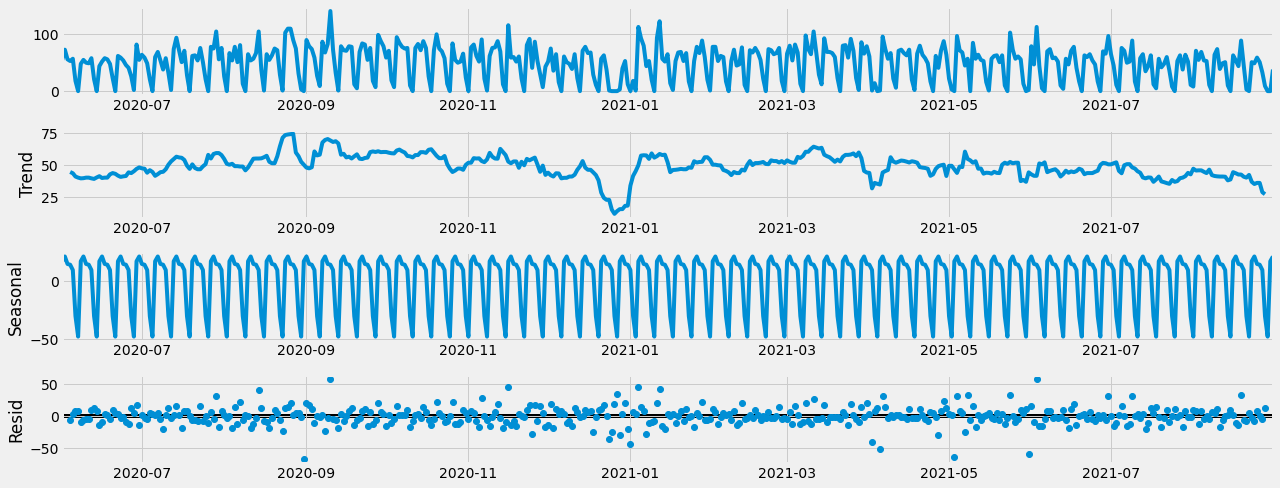

In [17]:
decomposition.plot()
plt.savefig(os.path.join(vizpath,'00a Time Series - Daily Requests Decomposition - 01Jun2020 to 31Aug2021.png'))

#### Observations of filtered time sereis:
1.	Trend: as an overall picture, the Trend is relatively steady with the exception of End2020.
2.  Seasonaility: Seasonality is present, which is generally to be expeceted.
3.  Residual: There is a strong existence of noise which is not uncommon for daily data values.

## Stationarity Checks:
-   DickeyFuller
-   Autocorrelation

### Dickey-Fuller Test for Stationarity
1.   Import the adfuller() function
2.   Create a user-defined function
3.   Run the test
4.   Interpret the results

### import adfuller( ) function

In [27]:
from statsmodels.tsa.stattools import adfuller

### define function: dickey_fuller

In [28]:
def dickey_fuller(timeseries):
    print ('Dickey-Fuller Test for Stationarity:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])

    for key,value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print (result)

### run the dickey-fuller test

In [23]:
dickey_fuller(df_request_day['requests_per_day'])

Dickey-Fuller Test for Stationarity:
Test Statistic                  -3.003297
p-value                          0.034588
Number of Lags Used             13.000000
Number of Observations Used    443.000000
Critical Value (1%)             -3.445198
Critical Value (5%)             -2.868086
Critical Value (10%)            -2.570257
dtype: float64


### Interpret the results
Dickey-Fuller Result Measures:
1.   p-value:
     - a measure of strength of evidence.
     - the smaller the p-value the less likely the outcome is by chance.
     - p-value should be <= 5% (0.05).
     

2.   Test Statistic:
      - the result of the actual test taken from the data.
      

3.   Critical Value:
     - to be compared against the Test Statitics.
	 - at an accuracy or Level of Significance (alpha) of 1%, 5% or 10%.

Interpreting Dickey-Fuller Results:

- If p-value > 0.05  -->  H0 - Fail to Reject H0
- If p-value < 0.05  -->  Ha - Reject Null Hypothesis


- If Test Statistic > Critial Value  -->  Fail to Reject H0
- If Test Statistic < Critial Value  -->  Reject the Null Hypothesis


- The more negative the Test Statitic; the stronger the rejection of H0.

### DF Results:
    - p-value: 0.03  < alpha: 0.05 = Ha
    - Test Statistic: -3.00 < Critial Value: -2.86 = Ha

The above results mean that H0 can be rejected in favour of Ha, meaning that the data does not contain a Unit Root and is therefore considered Stationary.

## Test for Autocorrelation

### import act and pacf functions

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### display plot

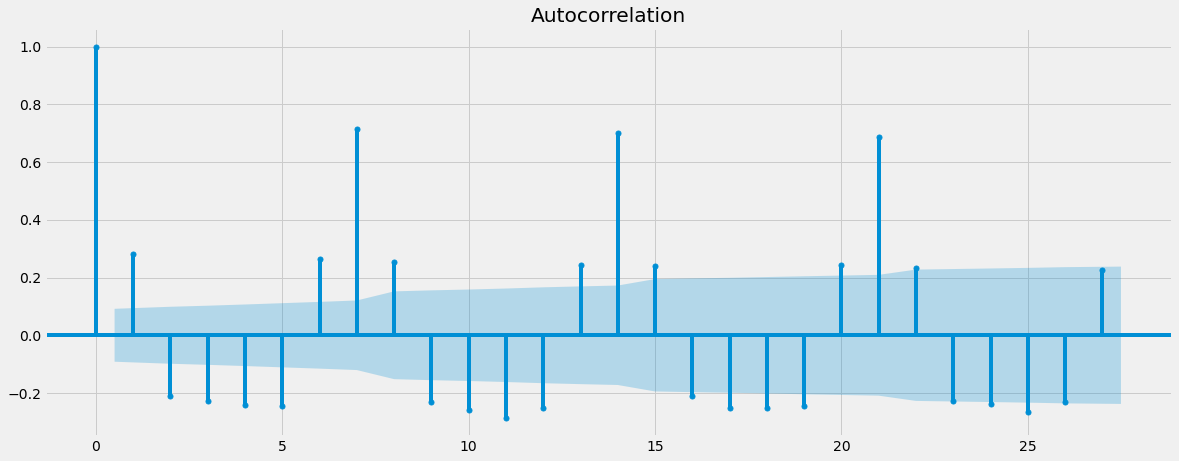

In [20]:
plot_acf(df_request_day)
plt.savefig(os.path.join(vizpath,'00b Time Series - Autocorrelation Test - Original Data.png'))

#### Autocorrelation Interpretation
1.  The blue lines represent the lag.
2.  The shaded area represents the Confidence Interval.
3.  Lines above the shaded area indicate Autocorrelation.
4.  Multiple lines above the shaded area indicate non-stationary data.

The autocorrelation plot indicates that the time series has autocorrelation and is therefore considered Non-Stationary.  In an alternative notebook, after 12 rounds of Differencing, the autocorrelation remained.  Added to which the ARIMA model will not accept a 'd' parameter greater than 2.

## Smoothing with Moving Average
Owing to the noise associated with daily observations in a time-series, coupled with the autocorrelation that is evident, the time series os to be smoothed using a 3 day moving average.

### create 6 day moving average column

In [47]:
df_request_day['MA'] = df_request_day['requests_per_day'].rolling(window=6).mean()
df_request_day.head(10)

,requests_per_day,MA
date,,
2020-06-01,55,NaN
2020-06-02,73,NaN
2020-06-03,56,NaN
2020-06-04,53,NaN
2020-06-05,57,NaN
2020-06-06,18,52.000000
2020-06-07,0,42.833333
2020-06-08,48,38.666667
2020-06-09,55,38.500000


### display as original data and MA as plot

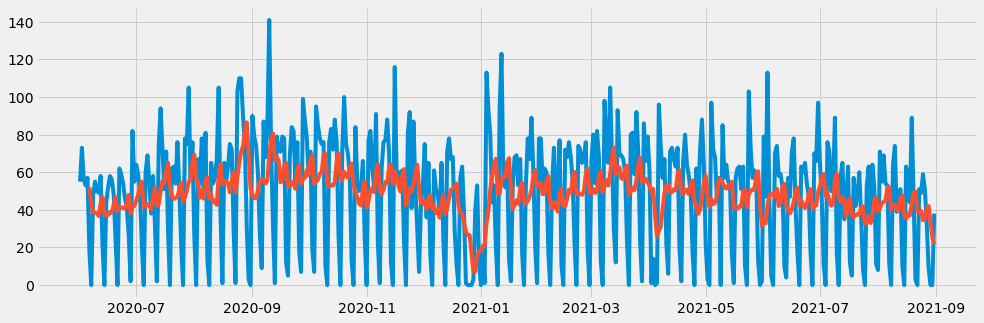

In [48]:
plt.figure(figsize=(15,5))
plt.plot(df_request_day)

plt.savefig(os.path.join(vizpath,'01 Time Series - Stone Signs Daily Requests & 6 Day MA - 01Jun2020 to 31Aug2021.png'))

### save MA to dataframe

In [49]:
df_request_ma = df_request_day.drop(columns=['requests_per_day'])
df_request_ma.head(10)

,MA
date,
2020-06-01,NaN
2020-06-02,NaN
2020-06-03,NaN
2020-06-04,NaN
2020-06-05,NaN
2020-06-06,52.000000
2020-06-07,42.833333
2020-06-08,38.666667
2020-06-09,38.500000


### discard rows 0:4

In [50]:
df_request_ma = df_request_ma[5:]
df_request_ma.head()

,MA
date,
2020-06-06,52.000000
2020-06-07,42.833333
2020-06-08,38.666667
2020-06-09,38.500000
2020-06-10,38.000000


### show MA as decomposed

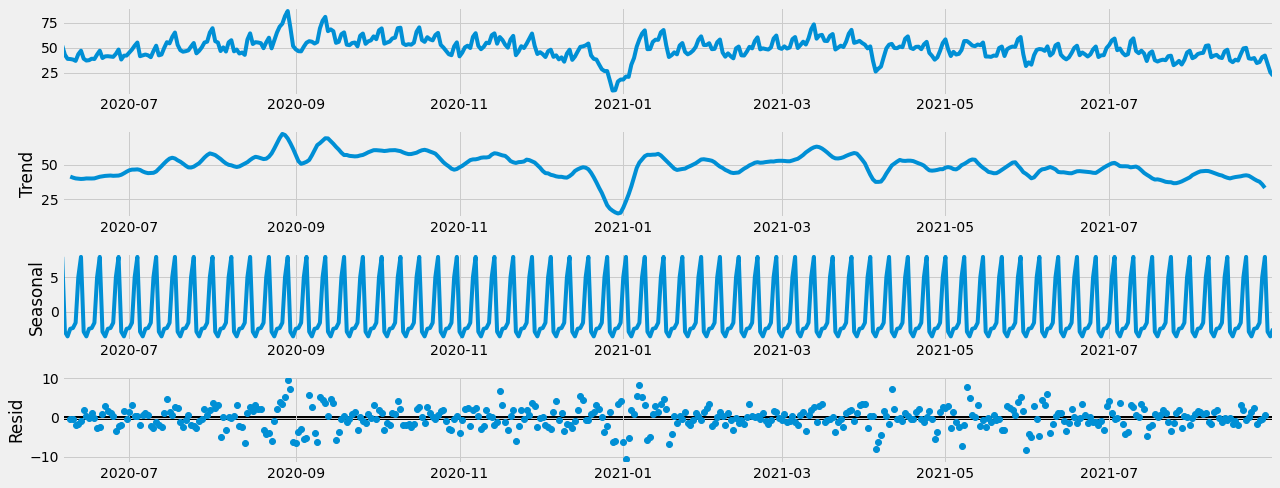

In [64]:
decomposition = sm.tsa.seasonal_decompose(df_request_ma, model='additive')
decomposition.plot()

plt.savefig(os.path.join(vizpath,'01a Time Series - 6 Day Moving Average Decomp. - 06Jun2020 to 31Aug2021.png'))

Compared to original data, noise is not very much reduced.

## Revisit Dickey-Fuller & Autocorrelation Tests for MA Time Series

In [53]:
dickey_fuller(df_request_ma['MA'])

Dickey-Fuller Test for Stationarity:
Test Statistic                  -1.726415
p-value                          0.417557
Number of Lags Used             18.000000
Number of Observations Used    433.000000
Critical Value (1%)             -3.445543
Critical Value (5%)             -2.868238
Critical Value (10%)            -2.570338
dtype: float64


#### DF Results:
    - p-value: 0.41  > alpha: 0.05 = H0
    - Test Statistic: -1.72 > Critial Value: -2.86 = H0

Both comparisons result in a failiure to reject the Null hypothesis.

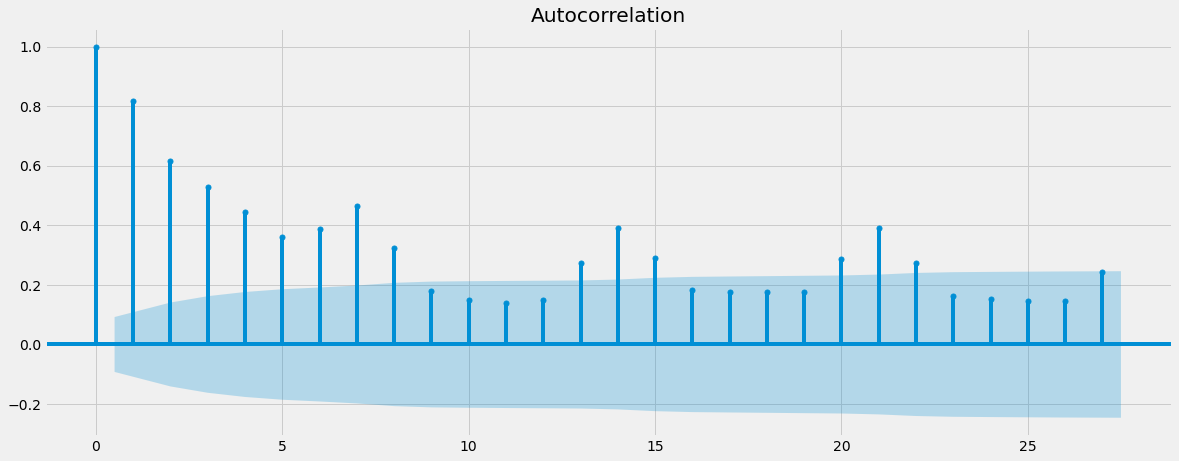

In [68]:
plot_acf(df_request_ma)
plt.savefig(os.path.join(vizpath,'01b Time Series - Autocorrelation Test - 6 Day Moving Average.png'))

Compared to the original data, the 6day MA has few autocorrelation and (hopefully) will lend itself well to Differencing.

## Converting a Non-stationary time series to Stationary using Differencing
1.   Apply a round of Differencing.
2.   Check for null values created by the Differencing, & replace with zero.
3.   Plot data.
4.   Re-apply Stationarity checks: Dickey-Fuller & Autocorrelation.
5.   Repeat as necessary.

### differencing round1

In [55]:
df_diff1 = df_request_ma - df_request_ma.shift(1)
# where shift(1) = t(t-1)

### check for nulls and replace with zero

In [56]:
df_diff1.isnull().sum()

MA    1
dtype: int64

In [57]:
df_diff1['MA'] = df_diff1['MA'].fillna(0)
df_diff1.isnull().sum()

MA    0
dtype: int64

### plot "differenced" data

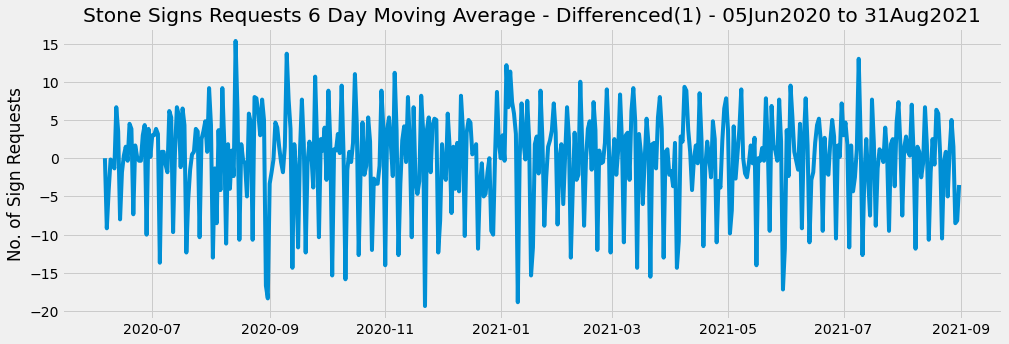

In [65]:
plt.figure(figsize=(15,5))
plt.title('Stone Signs Requests 6 Day Moving Average - Differenced(1) - 05Jun2020 to 31Aug2021')
plt.ylabel('No. of Sign Requests')
plt.plot(df_diff1)

plt.savefig(os.path.join(vizpath,'02 Time Series - Requests 6 Day Moving Avg.-Diff(1) - 06Jun2020 to 31Aug2021.png'))

### reapply dickey-fuller test

In [59]:
dickey_fuller(df_diff1)

Dickey-Fuller Test for Stationarity:
Test Statistic                -6.684298e+00
p-value                        4.264462e-09
Number of Lags Used            1.800000e+01
Number of Observations Used    4.330000e+02
Critical Value (1%)           -3.445543e+00
Critical Value (5%)           -2.868238e+00
Critical Value (10%)          -2.570338e+00
dtype: float64


#### DF Results:
- p-value: 0.00000000426  < alpha: 0.05 = Ha
- Test Statistic: -6.68 < Critial Value: -2.86 = Ha

The above results mean that H0 can be rejected in favour of Ha, meaning that the data does not contain a Unit Root and is therefore considered Stationary.

### reapply autocorrelation test

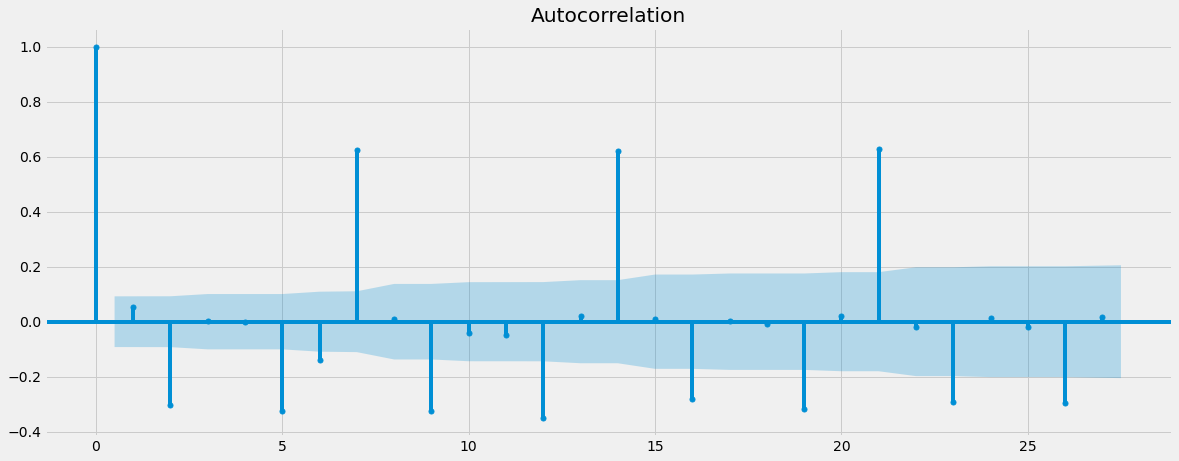

In [60]:
plot_acf(df_diff1)
plt.savefig(os.path.join(vizpath,'02b Time Series - Autocorrelation Test - 6 Day Moving Average-Diff(1).png'))

### differencing round2

In [61]:
df_diff2 = df_diff1 - df_diff1.shift(1)
# where shift(1) = t(t-1)

### replace nulls with zero

In [62]:
df_diff2.isnull().sum()

MA    1
dtype: int64

In [63]:
df_diff2['MA'] = df_diff2['MA'].fillna(0)
df_diff2.isnull().sum()

MA    0
dtype: int64

### display diff2 as plot

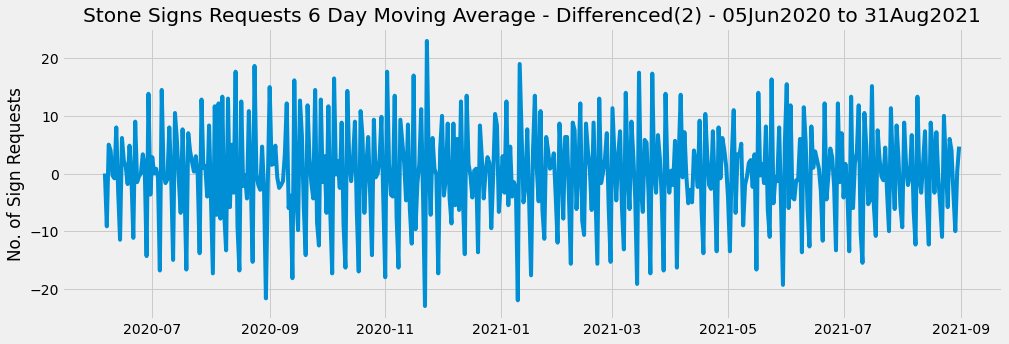

In [66]:
plt.figure(figsize=(15,5))
plt.title('Stone Signs Requests 6 Day Moving Average - Differenced(2) - 05Jun2020 to 31Aug2021')
plt.ylabel('No. of Sign Requests')
plt.plot(df_diff2)

plt.savefig(os.path.join(vizpath,'03 Time Series - Requests 6 Day Moving Avg.-Diff(2) - 06Jun2020 to 31Aug2021.png'))

No need to repeat Dicky-Fuller test as earlier results show a Stationary Time Series.

### repeat autocorrelation test

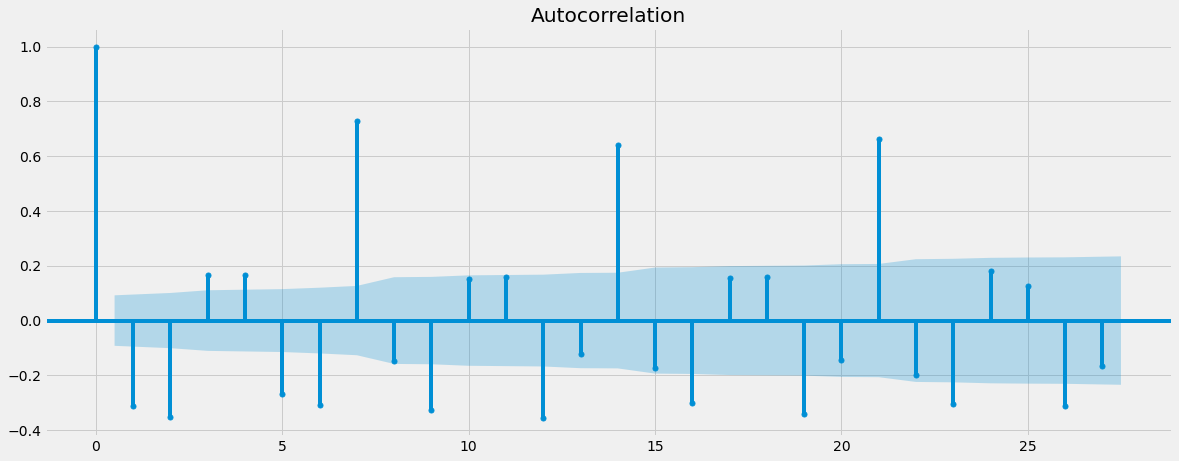

In [67]:
plot_acf(df_diff2)
plt.savefig(os.path.join(vizpath,'03b Time Series - Autocorrelation Test - 6 Day Moving Average-Diff(2).png'))

The above results of the autocorrelation test show that the data is suitable for a 3rd round of Differencing, however the ARIMA model does not support d>2.

### convert time series to dataframe and export to CSV

In [69]:
df_diff2 = df_diff2.reset_index()
df_diff2.head()

,date,MA
0,2020-06-06,0.000000
1,2020-06-07,-9.166667
2,2020-06-08,5.000000
3,2020-06-09,4.000000
4,2020-06-10,-0.333333


In [71]:
df_diff2.to_csv(os.path.join(dataset,'time_series_requests_6day_MA_from_Jun2020_Diff(2).csv'), index=False)

### conver df_request_ma to dataframe and export to CSV

In [72]:
df_request_ma = df_request_ma.reset_index()
df_request_ma.head()

,date,MA
0,2020-06-06,52.000000
1,2020-06-07,42.833333
2,2020-06-08,38.666667
3,2020-06-09,38.500000
4,2020-06-10,38.000000


In [73]:
df_request_ma.to_csv(os.path.join(dataset,'time_series_requests_6day_MA_from_Jun2020.csv'), index=False)